In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
from Core import Nanoparticle as NP
from Core import EnergyCalculator as EC

from LocalOpt.GarbageExchangeOperator import GuidedExchangeOperator
from Core.LocalEnvironmentCalculator import NeighborCountingEnvironmentCalculator
from Core.LocalEnvironmentFeatureClassifier import TopologicalEnvironmentClassifier

from Core.GlobalFeatureClassifier import TopologicalFeatureClassifier as TFC

import copy
import pickle


In [4]:
with open('/media/riccardo/HardDisk/PORTALHOME/PtAu_PtCu_201/Global_Opt/energy_calculators/energy_calculator_PtCu_TEC.pkl', 'rb') as inp:
    energy_calculator = pickle.load(inp)

In [5]:
initial_p = NP.Nanoparticle()
initial_p.truncated_octahedron(7,2,{'Pt':0.5,'Au':0.5})

Resulting stoichiometry: {'Au': 101, 'Pt': 100}


In [6]:
symbols = sorted(initial_p.atoms.get_all_symbols())
local_env_calculator = NeighborCountingEnvironmentCalculator(symbols)
local_feature_classifier = TopologicalEnvironmentClassifier(local_env_calculator, symbols)

In [7]:
local_feature_classifier.compute_feature_vector(initial_p, recompute_local_environments = True)

In [18]:
from Core import Nanoparticle as NP
from Core.LocalEnvironmentCalculator import NeighborCountingEnvironmentCalculator
from Core.LocalEnvironmentFeatureClassifier import TopologicalEnvironmentClassifier
from BH.BasinHopping import run_basin_hopping

start_particle = NP.Nanoparticle()
start_particle.truncated_octahedron(10,2,{'Pt':0.5,'Cu':0.5})

symbols = sorted(start_particle.atoms.get_all_symbols())
local_env_calculator = NeighborCountingEnvironmentCalculator(symbols)
local_feature_classifier = TopologicalEnvironmentClassifier(local_env_calculator, symbols)

with open('/media/riccardo/HardDisk/PORTALHOME/PtAu_PtCu_201/Global_Opt/energy_calculators/energy_calculator_PtCu_TEC.pkl', 'rb') as inp:
    energy_calculator = pickle.load(inp)
    environment_energies = energy_calculator.get_coefficients()

[best_particle, lowest_energies, dio_porco_list] = run_basin_hopping(start_particle, energy_calculator, environment_energies, 100,30,
                      local_feature_classifier=None)

Resulting stoichiometry: {'Cu': 320, 'Pt': 320}
Energy after local_opt: 128.809, lowest 128.809
Energy after local_opt: 127.781, lowest 127.781
Energy after local_opt: 127.631, lowest 127.567
Energy after local_opt: 127.949, lowest 127.519
Energy after local_opt: 127.738, lowest 127.519
Lowest energy: 127.394


In [23]:
from ase.visualize import view

view(best_particle.get_ase_atoms())

<Popen: returncode: None args: ['/home/riccardo/anaconda3/bin/python', '-m',...>

In [20]:
from ase.calculators.emt import EMT
from ase.optimize import BFGS

atoms = best_particle.get_ase_atoms()
atoms.calc = EMT()
dyn = BFGS(atoms)
dyn.run(steps=100, fmax=0.05)

      Step     Time          Energy         fmax
BFGS:    0 17:19:11      151.083193        2.3974
BFGS:    1 17:19:12      144.171737        2.2117
BFGS:    2 17:19:12      116.029393        1.4211
BFGS:    3 17:19:13      111.652138        2.5963
BFGS:    4 17:19:14      108.223138        1.8634
BFGS:    5 17:19:15       95.204118        1.0709
BFGS:    6 17:19:16       89.720817        1.8128
BFGS:    7 17:19:16       86.583214        1.9184
BFGS:    8 17:19:17       78.348444        1.6575
BFGS:    9 17:19:18       74.361121        1.1484
BFGS:   10 17:19:19       71.417350        1.3374
BFGS:   11 17:19:20       69.665501        1.3877
BFGS:   12 17:19:21       65.070410        0.8605
BFGS:   13 17:19:21       63.565451        0.8259
BFGS:   14 17:19:22       62.244172        0.9002
BFGS:   15 17:19:23       61.402370        0.6887
BFGS:   16 17:19:24       60.724922        0.3984
BFGS:   17 17:19:25       60.394736        0.3951
BFGS:   18 17:19:26       60.242218        0.4235
B

True

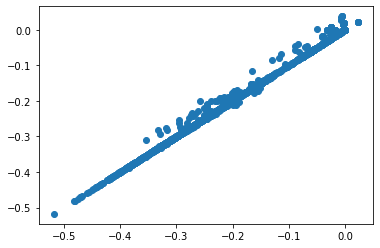

In [103]:
import matplotlib.pyplot as plt
plt.scatter([x[0] for x in dio_porco_list], [x[1] for x in dio_porco_list])

In [307]:
self = p_list[0][1]
particle = p_list[0][0]
atom_features = particle.get_atom_features('TEC')
feature = atom_features[10]
new_exchange_energy = self.env_energy_differences[self.env_from_feature(feature)]

energy_change = 0
for neigh_idx in particle.get_coordination_atoms(10):
    neigh_feature = atom_features[neigh_idx]
    energy_change -= self.neigh_energy_difference[neigh_feature-1]

print(-new_exchange_energy + energy_change)

0.02133283293178795


In [305]:
p = p_list[0][0]
exchange_operator = GuidedExchangeOperator(energy_calculator.get_coefficients(), 'TEC')
exchange_operator.bind_particle(p)

for f,i in zip(exchange_operator.symbol1_exchange_energies.values(), p_list[0][1].symbol1_exchange_energies.values()):
    print(f,i)

-0.07618079522257848 -0.07618079522257848
-0.0010733459568072895 -0.0010733459568072895
-0.03184662151090556 -0.03184662151090556
-0.0068523687691876 -0.0068523687691876
-0.06218839905860009 -0.06218839905860009
-0.1906807508604167 -0.1906807508604167
0.02133283293178795 0.008643576319709134
-0.07755008060702405 -0.10009029791307235
-0.13348034654402444 -0.06133721180024872
-0.0789902101966506 -0.08616918813967518
-0.06185000394029243 0.06666777884188867
-0.026774490112065397 -0.026774490112065397
-0.045165935363284615 0.00815620371418968
-0.17593213587716014 -0.03149713258479861
-0.0927259961711715 0.051951780149859794
0.051951780149859794 0.01302304014239447
0.01302304014239447 -0.20380340141124054
-0.20380340141124054 -0.15254302319786678
-0.15254302319786678 -0.047841125449395755
-0.047841125449395755 0.020546029486071482
0.07780577373718253 -0.19487070284613384
-0.19487070284613384 -0.11310906186341127
-0.11310906186341127 0.03496429617788474
0.09335002390495784 -0.144819511901677

In [219]:
local_feature_classifier.compute_feature_vector(p, recompute_atom_features=True, recompute_local_environments=True)
energy_calculator.compute_energy(p)
initial_energy = p.get_energy('BRR')
print(initial_energy)

42.787356908859664


In [220]:
symbol1_index, symbol2_index = exchange_operator.guided_exchange(p)
local_feature_classifier.compute_feature_vector(p, recompute_atom_features=True, recompute_local_environments=True)
energy_calculator.compute_energy(p)
p.get_energy('BRR') - initial_energy


-0.5360991555254842

In [245]:
p = p_list[0]
local_feature_classifier.compute_feature_vector(p, recompute_atom_features=True, recompute_local_environments=True)
atom_feature = p.get_atom_features('TEC')
for f in p.get_coordination_atoms(23):
    print(atom_feature[f])

85
144
48
34
86
143
25
33
178


In [244]:
p_t0 = p_list[0]
#local_feature_classifier.compute_feature_vector(p_t0, recompute_atom_features=True, recompute_local_environments=True)
atom_feature = p_t0.get_atom_features('TEC')
for f in p_t0.get_coordination_atoms(23):
    print(atom_feature[f])

85
144
48
34
86
143
25
33
178


In [28]:
def update_atomic_features(index1, index2, local_env_calculator, local_feature_classifier, particle):
    neighborhood = {index1, index2}
    neighborhood = neighborhood.union(particle.neighbor_list[index1])
    neighborhood = neighborhood.union(particle.neighbor_list[index2])

    for index in neighborhood:
        local_env_calculator.compute_local_environment(particle, index)
        local_feature_classifier.compute_atom_feature(particle, index)
    
    local_feature_classifier.compute_feature_vector(particle, recompute_atom_features=False)
    return particle, neighborhood

In [10]:
particle = copy.deepcopy(initial_p)
exchange_operator = GuidedExchangeOperator(energy_calculator.get_coefficients(), 'TEC')
exchange_operator.bind_particle(particle)

energy_calculator.compute_energy(particle)
initial_energy = particle.get_energy('BRR')

featuers = particle.get_atom_features('TEC')

exchange_indices = (exchange_operator.symbol1_indices[0], exchange_operator.symbol2_indices[0])
exchange_indices = (1,30)
for index in exchange_indices:
    flip = 0
    if particle.get_symbol(index) == 'Au':
        i = -1
        g = -1
    else:
        i = 1
        g = 0
    print(featuers[index], particle.get_local_environment(index), exchange_operator.env_energy_differences[exchange_operator.env_from_feature(featuers[index])])
    flip += exchange_operator.env_energy_differences[exchange_operator.env_from_feature(featuers[index])] * i
    for neigh in particle.neighbor_list[index]:
        print(featuers[neigh], particle.get_local_environment(neigh), exchange_operator.neigh_energy_difference[featuers[neigh]])
        flip += exchange_operator.neigh_energy_difference[featuers[neigh]+g] * i
    print(flip)


print(exchange_operator.symbol1_exchange_energies[exchange_indices[0]])
print(exchange_operator.symbol2_exchange_energies[exchange_indices[1]])

32 [4 3] -0.10561742448827949
141 [5 4] 0.0082829596557224
47 [2 7] 4.379716564512082e-05
24 [3 3] 0.0021400494416750626
86 [8 4] 0.0023647757551949478
116 [4 2] 0.020419678981577316
84 [6 6] -0.0012520023403504998
133 [6 2] 0.012289202421318798
0.06746994720347682
124 [5 2] -0.12091283267077335
50 [5 4] -0.0003955375498602143
133 [6 2] 0.012289202421318798
86 [8 4] 0.0023647757551949478
25 [4 2] 0.0029237782249300903
115 [3 3] 0.01595458877362005
49 [4 5] -0.0008764468990414831
84 [6 6] -0.0012520023403504998
-0.08990447428496166
0.06746994720347682
-0.08990447428496166


In [29]:
particle = copy.deepcopy(initial_p)
exchange_operator = GuidedExchangeOperator(energy_calculator.get_coefficients(), 'TEC')
exchange_operator.bind_particle(particle)



featuers = particle.get_atom_features('TEC')

feature_vectors = []
feature_vectors_recomp = []

for _ in range(20):
    energy_calculator.compute_energy(particle)
    initial_energy = particle.get_energy('BRR')
    symbol1_index, symbol2_index = exchange_operator.guided_exchange(particle)
    exchange_indices = [symbol1_index, symbol2_index]
    for index in exchange_indices:
        local_env_calculator.compute_local_environment(particle, index)
        local_feature_classifier.compute_atom_feature(particle, index)
        for neigh in particle.neighbor_list[index]:
            local_env_calculator.compute_local_environment(particle, neigh)
            local_feature_classifier.compute_atom_feature(particle, neigh)
        
    local_feature_classifier.compute_feature_vector(particle, recompute_atom_features=False)
    feature_vectors.append(particle.get_feature_vector('TEC'))
    local_env_calculator.compute_local_environments(particle)
    local_feature_classifier.compute_feature_vector(particle)
    feature_vectors_recomp.append(particle.get_feature_vector('TEC'))

    tot = 0
    for index in exchange_indices:
        flip = 0
        if particle.get_symbol(index) == 'Au':
            i = -1
            g = -1
        else:
            i = 1
            g = 0
        #print(featuers[index], particle.get_local_environment(index), exchange_operator.env_energy_differences[exchange_operator.env_from_feature(featuers[index])])
        flip += exchange_operator.env_energy_differences[exchange_operator.env_from_feature(featuers[index])] * i
        for neigh in particle.neighbor_list[index]:
            #print(featuers[neigh], particle.get_local_environment(neigh), exchange_operator.neigh_energy_difference[featuers[neigh]])
            flip += exchange_operator.neigh_energy_difference[featuers[neigh]+g] * i
        #print(flip)
        tot += flip

    energy_calculator.compute_energy(particle)
    final_energy = particle.get_energy('BRR')
    #print(initial_energy - final_energy)

    particle, neighborhood = update_atomic_features(symbol1_index, symbol2_index, local_env_calculator, local_feature_classifier, particle)
    exchange_operator.update(particle, neighborhood, exchange_indices)
    print(tot - (initial_energy - final_energy))
    

-2.6645352591003757e-15
5.329070518200751e-15
-2.7755575615628914e-15
2.55351295663786e-15
-3.885780586188048e-16
4.551914400963142e-15
0.004890181555743334
-0.019043606241363253
-1.9984014443252818e-15
0.0012814543256636224
7.105427357601002e-15
-8.659739592076221e-15
-1.887379141862766e-15
7.438494264988549e-15
1.4432899320127035e-15
-8.659739592076221e-15
-2.4424906541753444e-15
-0.012303660923031257
2.914335439641036e-15
1.27675647831893e-15


In [164]:
for not_rec, rec in zip(feature_vectors, feature_vectors_recomp):
    print(sum(not_rec-rec))

0.0
0.0
0.0


In [150]:
particle.swap_symbols([exchange_indices])

for index in exchange_indices:
    local_env_calculator.compute_local_environment(particle, index)
    local_feature_classifier.compute_atom_feature(particle, index)
    for neigh in particle.neighbor_list[index]:
        local_env_calculator.compute_local_environment(particle, neigh)
        local_feature_classifier.compute_atom_feature(particle, neigh)
    
local_feature_classifier.compute_feature_vector(particle, recompute_atom_features=False)

for index in exchange_indices:
    flip = 0
    if particle.get_symbol(index) == 'Au':
        i = -1
        g = -1
    else:
        i = 1
        g = 0
    print(featuers[index], particle.get_local_environment(index), exchange_operator.env_energy_differences[exchange_operator.env_from_feature(featuers[index])])
    flip += exchange_operator.env_energy_differences[exchange_operator.env_from_feature(featuers[index])] * i
    for neigh in particle.neighbor_list[index]:
        print(featuers[neigh], particle.get_local_environment(neigh), exchange_operator.neigh_energy_difference[featuers[neigh]])
        flip += exchange_operator.neigh_energy_difference[featuers[neigh]+g] * i
    print(flip)

energy_calculator.compute_energy(particle)
final_energy = particle.get_energy('BRR')
print(initial_energy - final_energy)

122 [3 4] -0.0840886793034629
49 [4 5] -0.0008764468990414831
142 [6 3] 0.00888576266289881
117 [5 1] 0.017906718644403574
84 [6 6] -0.0012520023403504998
114 [2 4] 0.013953451829155555
83 [5 7] -0.004343318877934377
132 [5 3] 0.007150331029852533
-0.04266418325447878
30 [2 5] -0.05712894127454171
141 [5 4] 0.0082829596557224
131 [4 4] 0.009484371885910808
174 [5 7] 0.006826096515411384
113 [1 5] 0.03256736685433745
117 [5 1] 0.017906718644403574
51 [6 3] -0.001955290106560481
85 [7 5] 0.0006729459370793389
0.00318090042661906
-0.03948328282786662


In [142]:
particle.swap_symbols([exchange_indices])

for index in exchange_indices:
    local_env_calculator.compute_local_environment(particle, index)
    local_feature_classifier.compute_atom_feature(particle, index)
    for neigh in particle.neighbor_list[index]:
        local_env_calculator.compute_local_environment(particle, neigh)
        local_feature_classifier.compute_atom_feature(particle, neigh)
    
local_feature_classifier.compute_feature_vector(particle, recompute_atom_features=False)

for index in exchange_indices:
    flip = 0
    if particle.get_symbol(index) == 'Au':
        i = -1
        g = -1
    else:
        i = 1
        g = 0
    print(featuers[index], particle.get_local_environment(index), exchange_operator.env_energy_differences[exchange_operator.env_from_feature(featuers[index])])
    flip += exchange_operator.env_energy_differences[exchange_operator.env_from_feature(featuers[index])] * i
    for neigh in particle.neighbor_list[index]:
        print(featuers[neigh], particle.get_local_environment(neigh), exchange_operator.neigh_energy_difference[featuers[neigh]])
        flip += exchange_operator.neigh_energy_difference[featuers[neigh]+g] * i
    print(flip)

energy_calculator.compute_energy(particle)
final_energy = particle.get_energy('BRR')
print(initial_energy - final_energy)

122 [3 4] -0.0840886793034629
49 [4 5] -0.0008764468990414831
142 [6 3] 0.00888576266289881
117 [5 1] 0.017906718644403574
84 [6 6] -0.0012520023403504998
114 [2 4] 0.013953451829155555
83 [5 7] -0.004343318877934377
132 [5 3] 0.007150331029852533
-0.04266418325447878
30 [2 5] -0.05712894127454171
141 [5 4] 0.0082829596557224
131 [4 4] 0.009484371885910808
174 [5 7] 0.006826096515411384
113 [1 5] 0.03256736685433745
117 [5 1] 0.017906718644403574
51 [6 3] -0.001955290106560481
85 [7 5] 0.0006729459370793389
0.00318090042661906
-0.03948328282786662


In [100]:
start_particle = copy.deepcopy(initial_p)
exchange_operator = GuidedExchangeOperator(coefficients, 'TEC')
exchange_operator.bind_particle(start_particle)
flips = []
permutations = []
particle_list = []

already_seen = set()

for i in range(3):
    energy_calculator.compute_energy(start_particle)
    start_energy = start_particle.get_energy('BRR')
    particle_list.append([copy.deepcopy(start_particle)])
    
    i1, i2 = exchange_operator.guided_exchange(start_particle)

    exchange_indices = [i1, i2]

    flip_energy = exchange_operator.symbol1_exchange_energies[i1] + exchange_operator.symbol2_exchange_energies[i2]
    
    start_particle, neighborhood = update_atomic_features(i1, i2, local_env_calculator,
                                                                 local_feature_classifier, start_particle)

    
    exchange_operator.update(start_particle, neighborhood, exchange_indices)

    energy_calculator.compute_energy(start_particle)
    final_energy = start_particle.get_energy('BRR')

    features = start_particle.get_atom_features('TEC')
    
    local_feature_classifier.compute_feature_vector(start_particle, recompute_atom_features=True)
    particle_list[i].append(start_particle.get_feature_vector('TEC'))
    

    flips.append(flip_energy)
    permutations.append(final_energy - start_energy)
    print(flip_energy,final_energy - start_energy, exchange_indices)

nada
-0.4614984126518692 -0.46149841265187774 [34, 163]
nada
-0.40619632711146236 -0.4099221493285796 [32, 170]
nada
-0.3938189538930364 -0.366952635913286 [96, 139]


In [101]:
print('New Flip \t old flip \t old permutation \t new permutation')
for i,f in enumerate(particle_list):
    local_feature_classifier.compute_feature_vector(f[0], recompute_atom_features=False)
    energy_calculator.compute_energy(f[0])
    i_en = f[0].get_energy('BRR')
    
    print(count)
    exchange_operator = GuidedExchangeOperator(coefficients, 'TEC')
    exchange_operator.bind_particle(f[0])
    i1, i2 = exchange_operator.guided_exchange(f[0])
    
    exchange_indices = [i1, i2]
    flip_energy = exchange_operator.symbol1_exchange_energies[i1] + exchange_operator.symbol2_exchange_energies[i2]

    local_feature_classifier.compute_feature_vector(f[0], recompute_atom_features=False)
    energy_calculator.compute_energy(f[0])
    f_en = f[0].get_energy('BRR')

    count = 0
    for n,o in zip(f[1], f[0].get_feature_vector('TEC')):
        if n != o:
            count += 1
    
    print('{:.4} \t {:.4} \t {:.4} \t {:.4} \t'.format(flip_energy, flips[i], permutations[i], f_en-i_en), exchange_indices)


New Flip 	 old flip 	 old permutation 	 new permutation
15
nada
-0.4615 	 -0.4615 	 -0.4615 	 0.0 	 [34, 163]
29
nada
-0.4099 	 -0.4062 	 -0.4099 	 0.0 	 [32, 170]
24
nada
-0.3812 	 -0.3938 	 -0.367 	 0.0 	 [158, 139]


In [21]:
f[1], f[0].get_feature_vector('TEC')

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  3.,  2.,
         2.,  0.,  0.,  0.,  4.,  5.,  7.,  2.,  0.,  0.,  0.,  0.,  2.,
         0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  7.,  6.,  9.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  6., 13., 14.,  4.,  3.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6.,  5.,  2.,
         0.,  0.,  0.,  2.,  1.,  5.,  6.,  3.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  8.,  3., 10.,
         3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 11., 13.,  8.

(-1.0, 0.2)

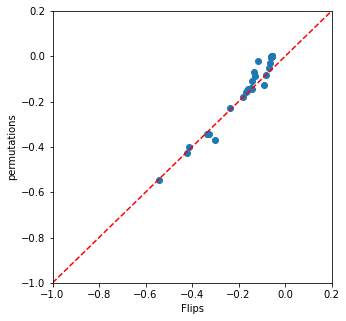

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(flips, permutations)
ax.set_xlabel('Flips')
ax.set_ylabel('permutations')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
ax.set_xlim(-1, .2)
ax.set_ylim(-1, .2)